In [1]:
 import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA')

# Verify the change
print(os.getcwd()) 

/Users/payalteyung/Desktop/DA


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors 
%matplotlib inline

In [3]:
file_1 = "1_news_articles.csv"
file_2 = "2_user_interest.csv"
file_3 = "3_user_rated_articles.csv"

In [4]:
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)

In [5]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True, sort=False)

In [6]:
df.head()

,Article_id,Title,Description,Date,Category,URL,Unnamed: 0,UserId,SessionId,Article Rank,Click,Time Spent (seconds),Ratings
0,0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",India,https://indianexpress.com/article/india/vaishn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",India,https://indianexpress.com/article/india/had-no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",India,https://indianexpress.com/article/india/corrup...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Kannur MP K Sudhakaran appointed chief of Cong...,Sudhakaran will replace Ramachandran who had a...,"June 8, 2021 5:04:40 pm",India,https://indianexpress.com/article/india/sudhak...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",India,https://indianexpress.com/article/india/kerala...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Article_id,Title,Description,Date,Category,URL,Unnamed: 0,UserId,SessionId,Article Rank,Click,Time Spent (seconds),Ratings
4471,2244,How learning about your genes can help with yo...,NaN,NaN,NaN,NaN,2244.0,2234.0,2229.0,5.0,NaN,28.0,4.0
4472,2245,"Malaika Arora shares yoga asanas for healthy, ...",NaN,NaN,NaN,NaN,2245.0,2235.0,2230.0,6.0,NaN,89.0,2.0
4473,2246,COVID-19 diet: Khichdi is a ‘safe’ option; oth...,NaN,NaN,NaN,NaN,2246.0,2236.0,2231.0,7.0,NaN,46.0,4.0
4474,2247,‘Keep listening. The world wants to hear your ...,NaN,NaN,NaN,NaN,2247.0,2237.0,2232.0,8.0,NaN,47.0,4.0
4475,2248,"Forget cold drinks, switch to refreshing bael ...",NaN,NaN,NaN,NaN,2248.0,2238.0,2233.0,9.0,NaN,34.0,3.0


In [8]:
df.shape

(4476, 13)

In [9]:
#the datatypes of the fileds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Article_id            4476 non-null   int64  
 1   Title                 4476 non-null   object 
 2   Description           3363 non-null   object 
 3   Date                  3363 non-null   object 
 4   Category              2250 non-null   object 
 5   URL                   3363 non-null   object 
 6   Unnamed: 0            2226 non-null   float64
 7   UserId                2226 non-null   float64
 8   SessionId             2226 non-null   float64
 9   Article Rank          2226 non-null   float64
 10  Click                 1113 non-null   object 
 11  Time Spent (seconds)  2226 non-null   float64
 12  Ratings               1113 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 454.7+ KB


In [10]:
df.describe()

,Article_id,Unnamed: 0,UserId,SessionId,Article Rank,Time Spent (seconds),Ratings
count,4476.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,1113.000000
mean,1117.262958,1109.947889,1099.985624,1095.026056,5.566038,54.293801,3.062893
std,650.751235,651.913284,651.849388,651.781356,2.876858,25.705732,1.420431
min,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000
25%,548.000000,536.000000,526.000000,521.000000,3.000000,33.000000,2.000000
50%,1123.500000,1123.000000,1113.000000,1108.000000,6.000000,54.000000,3.000000
75%,1680.250000,1668.000000,1658.000000,1653.000000,8.000000,76.000000,4.000000
max,2249.000000,2248.000000,2238.000000,2233.000000,10.000000,99.000000,5.000000


# Data Cleaning

Handling missing values

In [11]:
#Finding missing values
df.isnull()

,Article_id,Title,Description,Date,Category,URL,Unnamed: 0,UserId,SessionId,Article Rank,Click,Time Spent (seconds),Ratings
0,False,False,False,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,False,False,True,True,True,True,False,False,False,False,True,False,False
4472,False,False,True,True,True,True,False,False,False,False,True,False,False
4473,False,False,True,True,True,True,False,False,False,False,True,False,False
4474,False,False,True,True,True,True,False,False,False,False,True,False,False


In [12]:
df.isnull().sum()

Article_id                 0
Title                      0
Description             1113
Date                    1113
Category                2226
URL                     1113
Unnamed: 0              2250
UserId                  2250
SessionId               2250
Article Rank            2250
Click                   3363
Time Spent (seconds)    2250
Ratings                 3363
dtype: int64

In [13]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")  

In [14]:
# Drop rows where all column values are empty (NaN)
df = df.dropna(how="all")

In [15]:
df.shape

(4476, 12)

In [16]:
df.head()

,Article_id,Title,Description,Date,Category,URL,UserId,SessionId,Article Rank,Click,Time Spent (seconds),Ratings
0,0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",India,https://indianexpress.com/article/india/vaishn...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",India,https://indianexpress.com/article/india/had-no...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",India,https://indianexpress.com/article/india/corrup...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Kannur MP K Sudhakaran appointed chief of Cong...,Sudhakaran will replace Ramachandran who had a...,"June 8, 2021 5:04:40 pm",India,https://indianexpress.com/article/india/sudhak...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",India,https://indianexpress.com/article/india/kerala...,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Remove rows where 'UserId' is null
df.dropna(subset=['UserId'], inplace=True)

In [18]:
# Replace null values for float and integer columns with the mean
float_int_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in float_int_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [19]:
# Replace null values for object columns with the mode
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    if not df[col].mode().empty:  # Ensure there is a mode
        df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
df.tail()

,Article_id,Title,Description,Date,Category,URL,UserId,SessionId,Article Rank,Click,Time Spent (seconds),Ratings
4471,2244,How learning about your genes can help with yo...,A dispute had broken out between Singhdeo and ...,"June 5, 2021 7:00:19 pm",NaN,https://indianexpress.com/article/india/chhatt...,2234.0,2229.0,5.0,True,28.0,4.0
4472,2245,"Malaika Arora shares yoga asanas for healthy, ...",A dispute had broken out between Singhdeo and ...,"June 5, 2021 7:00:19 pm",NaN,https://indianexpress.com/article/india/chhatt...,2235.0,2230.0,6.0,True,89.0,2.0
4473,2246,COVID-19 diet: Khichdi is a ‘safe’ option; oth...,A dispute had broken out between Singhdeo and ...,"June 5, 2021 7:00:19 pm",NaN,https://indianexpress.com/article/india/chhatt...,2236.0,2231.0,7.0,True,46.0,4.0
4474,2247,‘Keep listening. The world wants to hear your ...,A dispute had broken out between Singhdeo and ...,"June 5, 2021 7:00:19 pm",NaN,https://indianexpress.com/article/india/chhatt...,2237.0,2232.0,8.0,True,47.0,4.0
4475,2248,"Forget cold drinks, switch to refreshing bael ...",A dispute had broken out between Singhdeo and ...,"June 5, 2021 7:00:19 pm",NaN,https://indianexpress.com/article/india/chhatt...,2238.0,2233.0,9.0,True,34.0,3.0


In [21]:
df.shape

(2226, 12)

In [22]:
df.isnull().sum()

Article_id                 0
Title                      0
Description                0
Date                       0
Category                2226
URL                        0
UserId                     0
SessionId                  0
Article Rank               0
Click                      0
Time Spent (seconds)       0
Ratings                    0
dtype: int64

In [23]:
df_duplicate = df.duplicated().any()
print(df_duplicate)

False


In [24]:
# Save the cleaned data for further analysis
df.to_csv('cleaned_user_behavior_data.csv', index=False)

# Feature Interaction Analysis

In [25]:
# Analyze feature interaction
feature_metrics = {
    'Click Through Rate (CTR)': df['Click'].mean(),
    'Average Time Spent (seconds)': df['Time Spent (seconds)'].mean(),
    'Average Ratings': df['Ratings'].mean()
}
print("Feature Interaction Metrics:", feature_metrics)

Feature Interaction Metrics: {'Click Through Rate (CTR)': 1.0, 'Average Time Spent (seconds)': 54.293800539083556, 'Average Ratings': 3.0628930817610067}


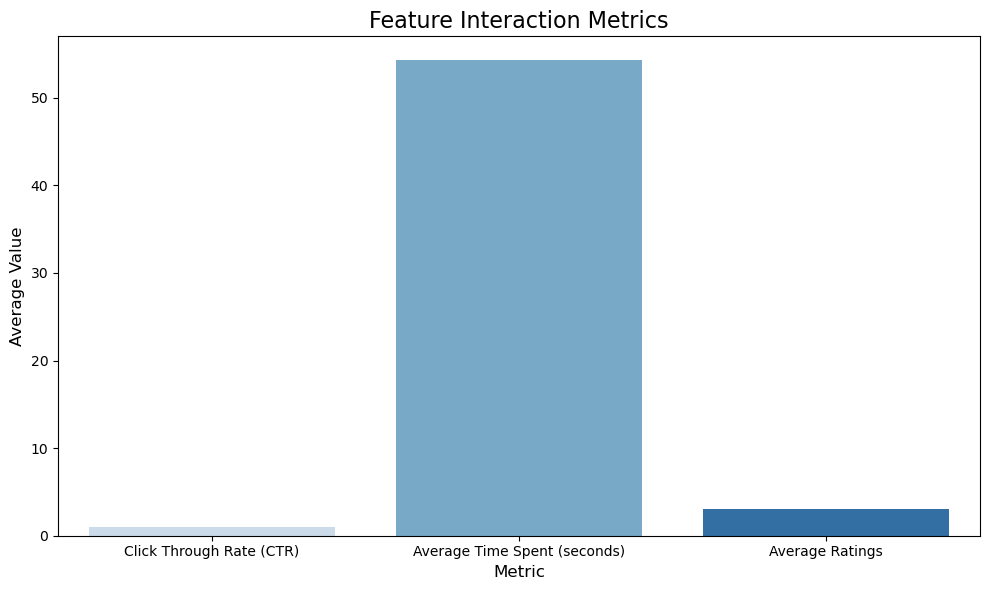

In [26]:
# Create a bar plot for feature interaction metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(feature_metrics.keys()), y=list(feature_metrics.values()), palette='Blues')
plt.title("Feature Interaction Metrics", fontsize=16)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# Count True and False values in 'Click' column
click_counts = df['Click'].value_counts()
print("Click Counts:")
print(click_counts)

Click Counts:
True    2226
Name: Click, dtype: int64


In [28]:
# Check if 'Category' is completely null
if df['Category'].isnull().all():
    df['Category'].fillna('Unknown', inplace=True) 

In [29]:
# Calculate feature engagement trends
feature_trends = df.groupby('Category')[['Click', 'Time Spent (seconds)']].mean().sort_values('Click', ascending=False)
print("Feature Trends by Category:")
print(feature_trends)

Feature Trends by Category:
          Click  Time Spent (seconds)
Category                             
Unknown     1.0             54.293801


# Content Preference Trends

In [30]:
# Analyze user preferences by title
content_preferences = df.groupby('Title')['Time Spent (seconds)'].mean()

In [31]:
# Article length analysis
df['Article Length'] = df['Description'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
article_length_trends = df.groupby('Title')['Article Length'].mean()

In [32]:
combined_trends = pd.DataFrame({
    'Average Time Spent (seconds)': content_preferences,
    'Average Article Length': article_length_trends
}).sort_values(by='Average Time Spent (seconds)', ascending=False)

In [33]:
print("Combined Content Preferences and Article Length by Title:")
display(combined_trends)

Combined Content Preferences and Article Length by Title:


,Average Time Spent (seconds),Average Article Length
Title,,
India players’ families to be allowed for UK trip; no BCCI officials for WTC final,99.0,31.0
Ghee vs butter: Which is better?,99.0,20.0
‘Connection will forever run deep’: Why Prince William has a happy-sad relationship with Scotland,99.0,21.0
Luciano Spalletti succeeds Gennaro Gattuso as Napoli head coach,99.0,27.5
"Supreme Court: Sedition law needs relook, especially for media",99.0,31.0
...,...,...
"Milkha Singh stable, oxygen requirement of wife increased marginally, says hospital",10.0,27.0
"Uddhav Thackeray meets PM Modi; discusses Maratha quota issue, GST compensation",10.0,23.0
"I’m her mate, not master: Irfan Pathan responds to criticism over wife’s blurred photo",10.0,21.0


In [34]:
# Merge both analyses into the existing df
df = df.merge(content_preferences, on='Title', how='left', suffixes=('', '_Average Time Spent'))
df = df.merge(article_length_trends, on='Title', how='left', suffixes=('', '_Average Article Length'))

In [35]:
df.head()

,Article_id,Title,Description,Date,Category,URL,UserId,SessionId,Article Rank,Click,Time Spent (seconds),Ratings,Article Length,Time Spent (seconds)_Average Time Spent,Article Length_Average Article Length
0,0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",Unknown,https://indianexpress.com/article/india/vaishn...,1.0,1.0,1.0,True,25.0,3.062893,21,25.0,23.5
1,1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",Unknown,https://indianexpress.com/article/india/had-no...,1.0,1.0,2.0,True,14.0,3.062893,33,14.0,29.5
2,2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",Unknown,https://indianexpress.com/article/india/corrup...,1.0,1.0,3.0,True,57.0,3.062893,36,51.0,31.0
3,4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",Unknown,https://indianexpress.com/article/india/kerala...,1.0,1.0,5.0,True,62.0,3.062893,31,42.0,28.5
4,8,Dantewada: 24-year-old tribal woman killed in ...,"The victim's mother alleged she was raped, and...","June 8, 2021 2:53:00 pm",Unknown,https://indianexpress.com/article/india/chhatt...,1.0,1.0,9.0,True,77.0,3.062893,19,53.0,22.5


In [36]:
# Top 15 Content Preferences by Average Time Spent (Title)
top_content_preferences = content_preferences.head(15)

# Top 15 Article Length Trends by Title
top_article_length_trends = article_length_trends.head(15)

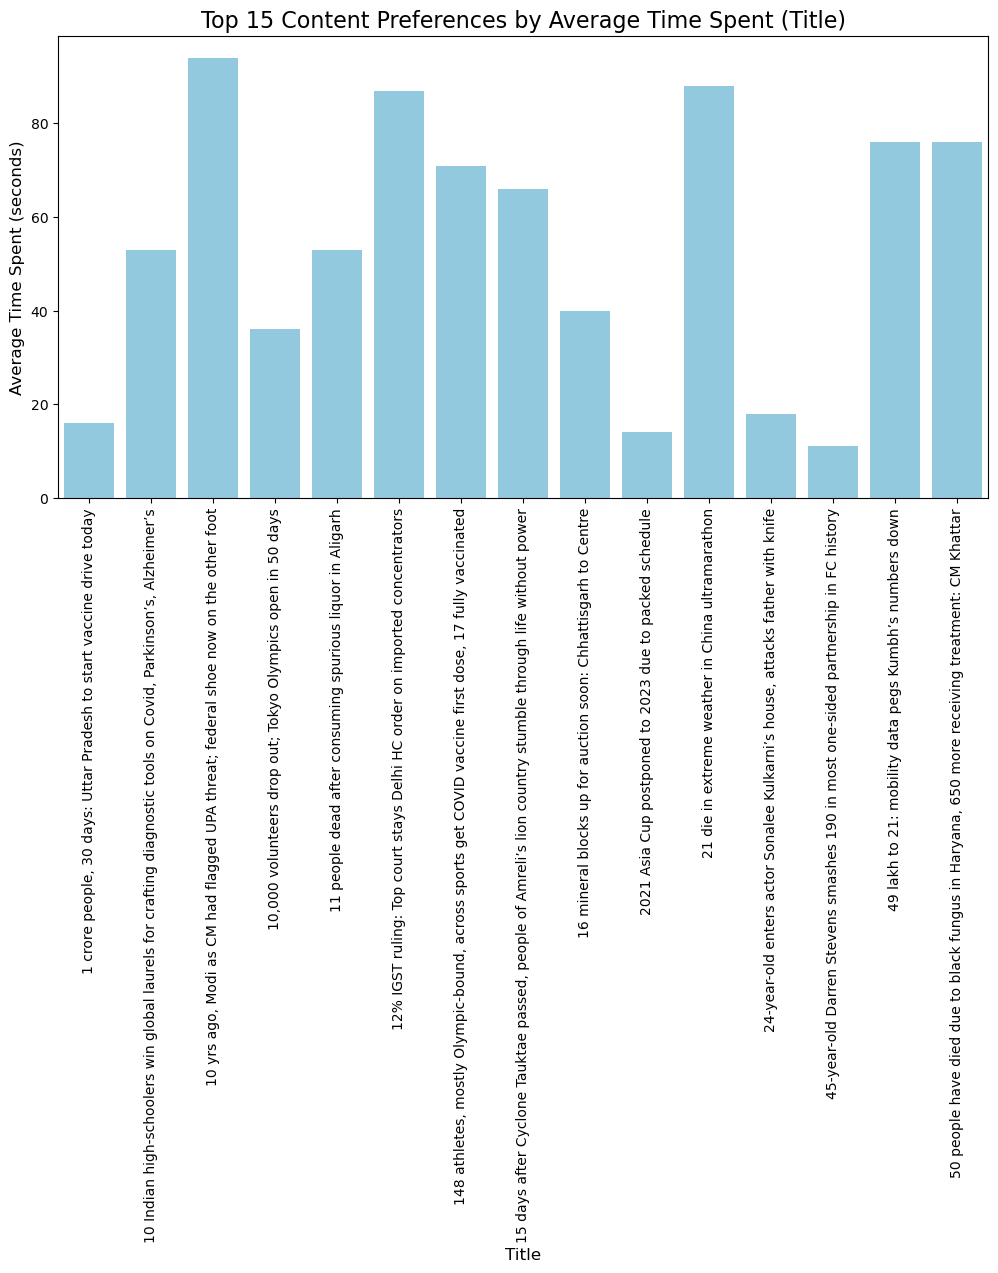

In [37]:

plt.figure(figsize=(12, 6))
sns.barplot(x=top_content_preferences.index, y=top_content_preferences.values, color='skyblue')
plt.title("Top 15 Content Preferences by Average Time Spent (Title)", fontsize=16)
plt.xlabel("Title", fontsize=12)
plt.ylabel("Average Time Spent (seconds)", fontsize=12)
plt.xticks(rotation=90)  # Rotate title labels for better readability
plt.tight_layout()
plt.show()

In [38]:
# Select the top 30 rows
top_30_combined_trends = combined_trends.head(30)

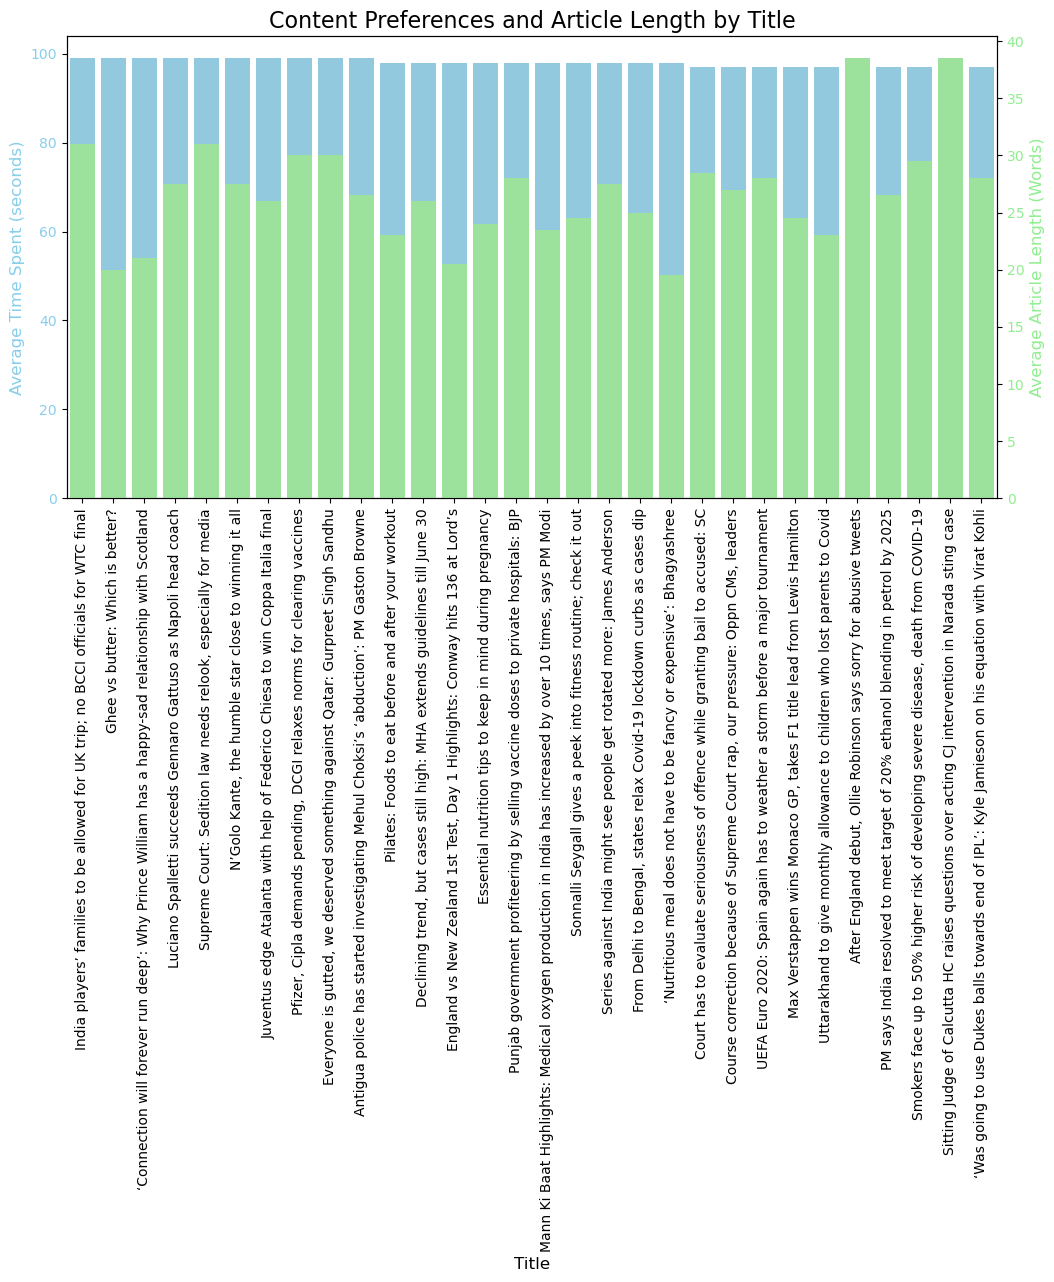

In [39]:
# Initialize the plot with a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Average Time Spent (seconds) on the left y-axis
sns.barplot(x=top_30_combined_trends.index, y=top_30_combined_trends['Average Time Spent (seconds)'], ax=ax1, color='skyblue')
ax1.set_xlabel("Title", fontsize=12)
ax1.set_ylabel("Average Time Spent (seconds)", fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title("Content Preferences and Article Length by Title", fontsize=16)
ax1.tick_params(axis='x', rotation=90)  

# Create a second y-axis to plot Average Article Length
ax2 = ax1.twinx()
sns.barplot(x=top_30_combined_trends.index, y=top_30_combined_trends['Average Article Length'], ax=ax2, color='lightgreen')
ax2.set_ylabel("Average Article Length (Words)", fontsize=12, color='lightgreen')
ax2.tick_params(axis='y', labelcolor='lightgreen')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

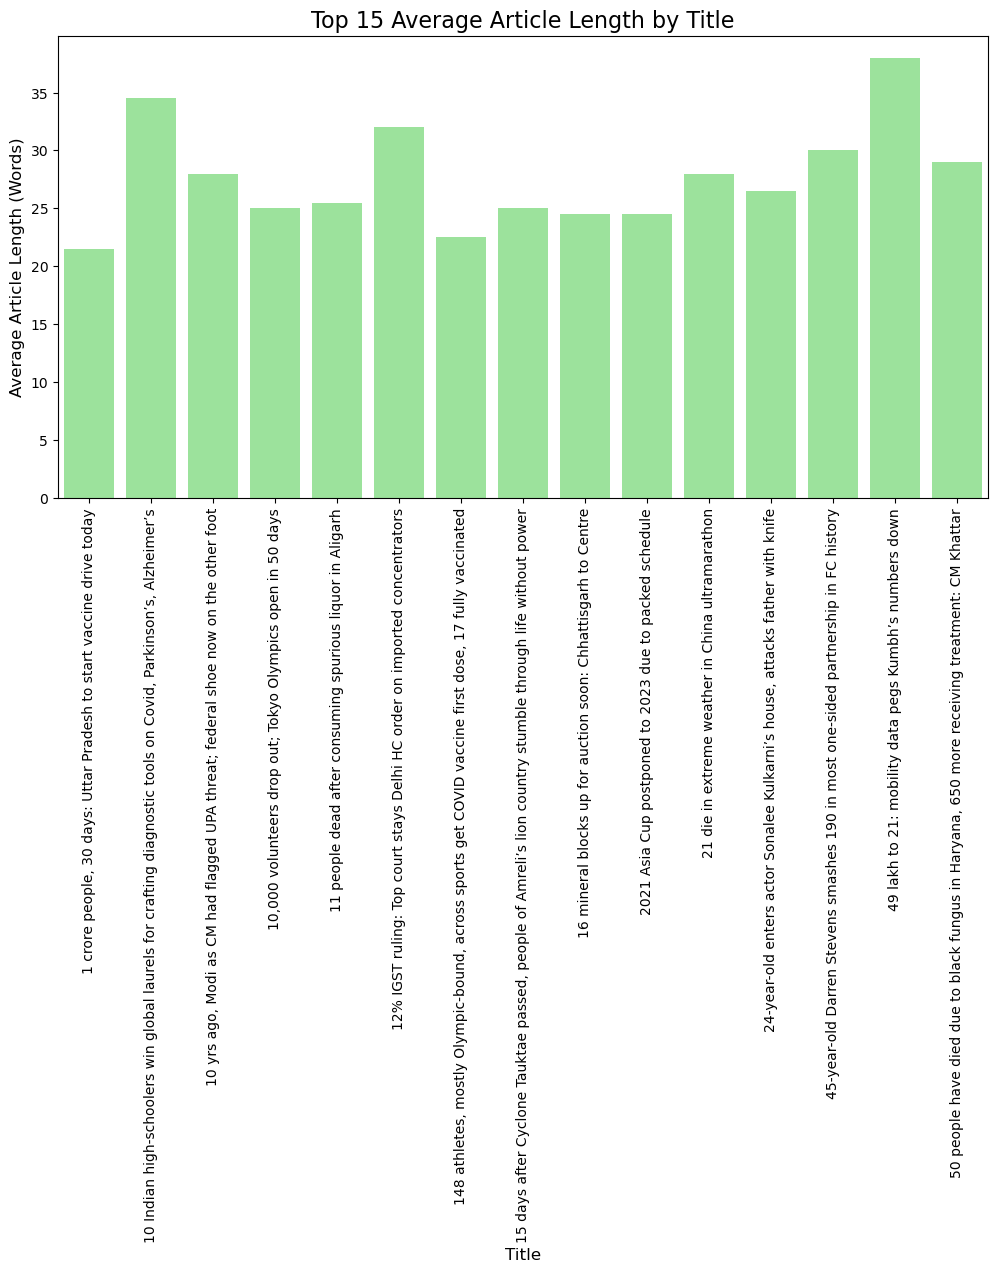

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_article_length_trends.index, y=top_article_length_trends.values, color='lightgreen')
plt.title("Top 15 Average Article Length by Title", fontsize=16)
plt.xlabel("Title", fontsize=12)
plt.ylabel("Average Article Length (Words)", fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

# User Engagement Insights

In [41]:
# Session-level analysis
session_metrics = df.groupby('SessionId').agg({
    'Time Spent (seconds)': 'sum',
    'Click': 'sum',
    'Ratings': 'mean'
}).sort_values('Time Spent (seconds)', ascending=False)
print("Top Sessions by Time Spent:")
print(session_metrics.head())

Top Sessions by Time Spent:
           Time Spent (seconds)  Click   Ratings
SessionId                                       
1.0                      1382.0     24  2.989780
324.0                     198.0      2  3.531447
1807.0                    198.0      2  2.531447
1343.0                    198.0      2  2.531447
1061.0                    198.0      2  4.031447


In [42]:
df_cleaned_sessions = df.dropna(subset=['SessionId'])
df_cleaned_users = df.dropna(subset=['UserId'])

In [43]:
top_sessions = df_cleaned_sessions.groupby('SessionId').agg({'Time Spent (seconds)': 'sum'}).sort_values('Time Spent (seconds)', ascending=False).head(10)

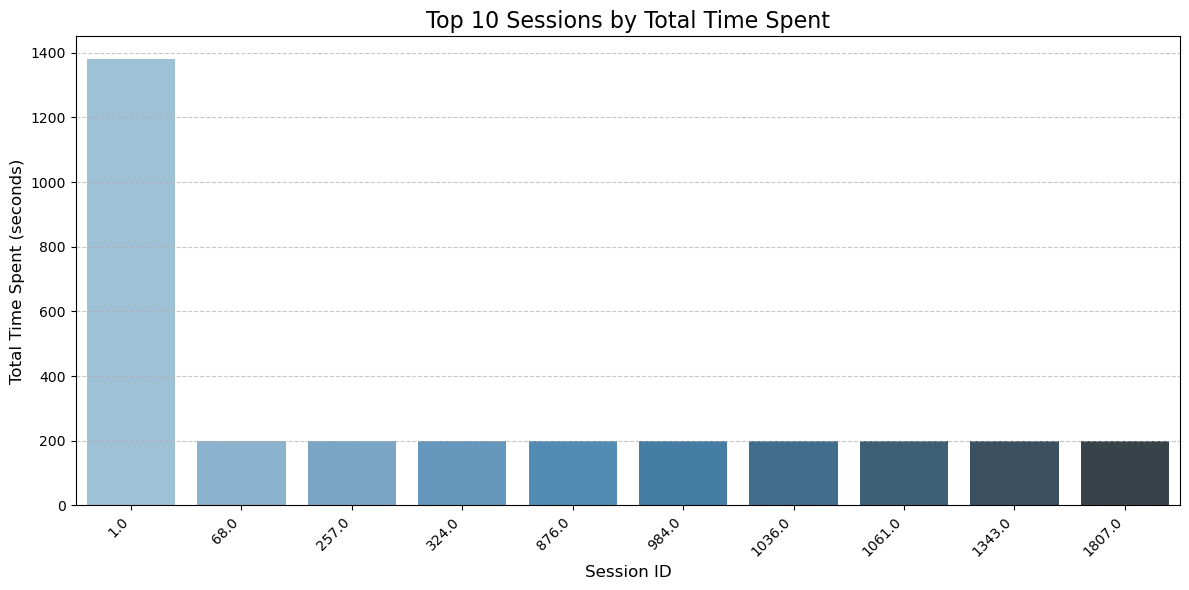

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sessions.index, y=top_sessions['Time Spent (seconds)'], palette='Blues_d')
plt.title("Top 10 Sessions by Total Time Spent", fontsize=16)
plt.xlabel("Session ID", fontsize=12)
plt.ylabel("Total Time Spent (seconds)", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

In [45]:
# Engagement by user
user_engagement = df.groupby('UserId').agg({
    'Time Spent (seconds)': 'sum',
    'Click': 'sum',
    'Ratings': 'mean'
}).sort_values('Time Spent (seconds)', ascending=False)
print("Top Engaged Users:")
print(user_engagement.head())

Top Engaged Users:
        Time Spent (seconds)  Click   Ratings
UserId                                       
1.0                    742.0     14  3.031447
1942.0                 198.0      2  2.531447
1066.0                 198.0      2  4.031447
1041.0                 198.0      2  4.031447
1812.0                 198.0      2  2.531447


In [46]:
top_users = df_cleaned_users.groupby('UserId').agg({'Time Spent (seconds)': 'sum'}).sort_values('Time Spent (seconds)', ascending=False).head(10)

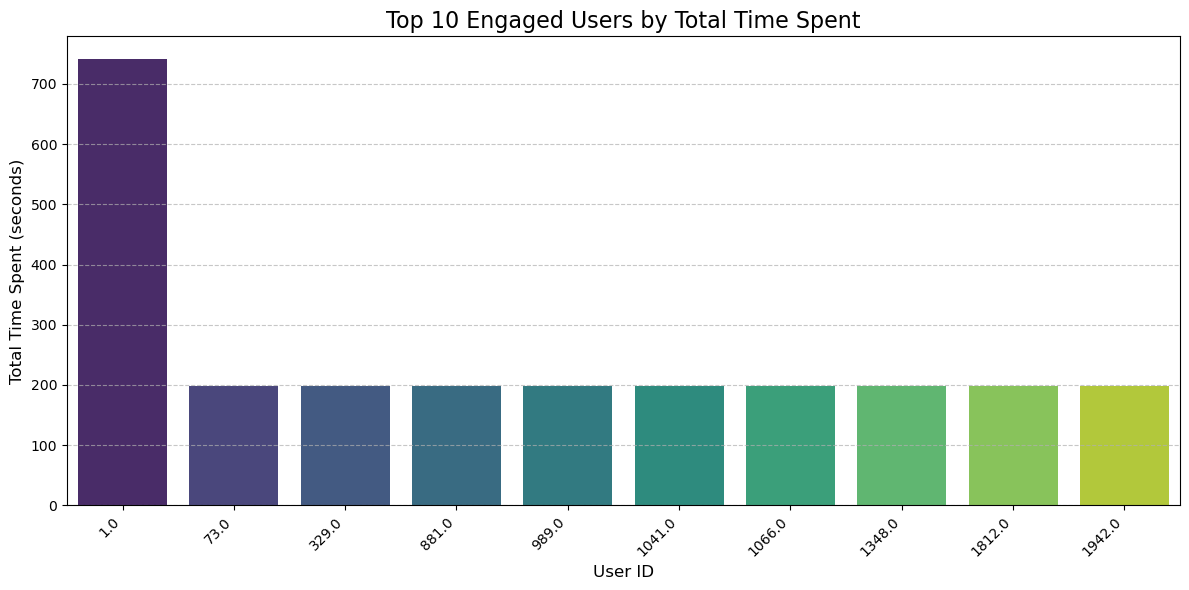

In [47]:
# Plot for Top Engaged Users by Total Time Spent
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users['Time Spent (seconds)'], palette='viridis')
plt.title("Top 10 Engaged Users by Total Time Spent", fontsize=16)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Total Time Spent (seconds)", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()